# Measurement --- PQVI points

In [1]:
import csv
import numpy as np

# # Create an empty list to store the 'Age' values
# P_g = []
# P_std = []
# Q_g = []
# Q_std = []
# V_t = []
# V_std = []
# I_a = []
# Ia_std = []
# I_f = []
# If_std = []

# # Open the CSV file
# with open('PQV-ss-data.csv', mode='r') as file:
#     # Create a CSV DictReader object
#     csv_dict_reader = csv.DictReader(file)
    
#     # Iterate over each row in the CSV file
#     for row in csv_dict_reader:
#         # Extract the 'Age' value and append it to the list
#         P_g.append(np.float32(row['P_g']))
#         P_std.append(np.float32(row['P_std']))
#         Q_g.append(np.float32(row['Q_g']))
#         Q_std.append(np.float32(row['Q_std']))
#         V_t.append(np.float32(row['V_t']))
#         V_std.append(np.float32(row['V_std']))
#         I_a.append(np.float32(row['Ia_avg']))
#         Ia_std.append(np.float32(row['Ia_std']))
#         I_f.append(np.float32(row['If']))
#         If_std.append(np.float32(row['If_std']))
        
# N_obs = len(P_g);

In [2]:
# Create an empty list to store the 'Age' values
P_g = []
Q_g = []
V_t = []
I_a = []
I_f = []

# Open the CSV file
with open('PQ_boosting.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        P_g.append(np.float32(row['P']))
        Q_g.append(np.float32(row['Q']))
        V_t.append(np.float32(row['Vt']))
        I_a.append(np.float32(row['Ia']))
        I_f.append(np.float32(row['If']))
        
N_obs = len(P_g);

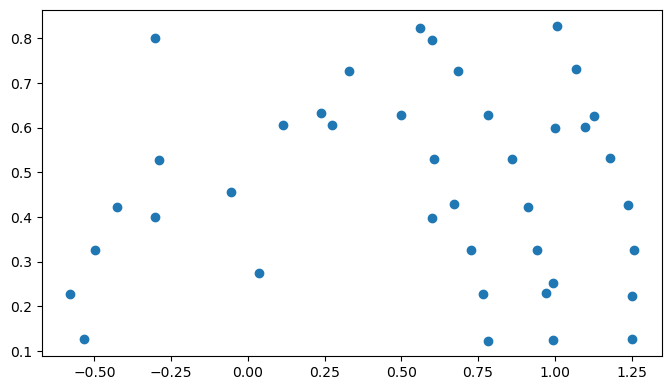

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16/2, 9/2)) #Ultra-wide aspect ratio
plt.scatter(Q_g,P_g)
plt.show()

# $R_{DC}$ Armature Resistance - Density Distribution Samples

In [13]:
# Create an empty list to store the 'Age' values
R20_s = []
DeltaT_s = []
R20_sq = []

# Open the CSV file
with open('C:/Users/drobl/OneDrive - USN/PhD Courses/Modern Experimental Design/Project/Repo_Codes/Generator-Parameter-Inference-Repo/Test 1 - DC Test/test_1_stator_result_data.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        R20_s.append(np.float32(row['R20']))
        DeltaT_s.append(np.float32(row['delta_t']))
        R20_sq.append(np.float32(row['R_20_sq']))

KeyError: 'R_20_sq'

In [ ]:
min_Rdc = min(len(R20_s),len(DeltaT_s),len(R20_sq))

# $X_q$ quadrature axis reactance - Density Distribution Samples

In [ ]:
# Create an empty list to store the 'Age' values
X_q = []

# Open the CSV file
with open('test_6_result_data.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        X_q.append(np.float32(row['x_q']))

In [ ]:
min_Xq = min(len(X_q),min_Rdc)

# $X_d$ direct axis reactance - Density Distribution Samples

In [ ]:
# Create an empty list to store the 'Age' values
X_d = []

# Open the CSV file
with open('Xd_calculation.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        X_d.append(np.float32(row['Xd']))

In [ ]:
min_Xd = min(len(X_d),min_Xq)

# $X_l$  leakage reactance - Density Distribution Samples

In [ ]:
# Create an empty list to store the 'Age' values
X_l = []

# Open the CSV file
with open('test_4_result_data.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        X_l.append(np.float32(row['x_l']))

In [ ]:
N_samples = min(len(X_l),min_Xd)

# OCC saturation curve parameters

In [ ]:
# Create an empty list to store the 'Age' values
k = []
C_m = []
m = []

# Open the CSV file
with open('test_2_result_data_last_low.csv', mode='r') as file:
    # Create a CSV DictReader object
    csv_dict_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_dict_reader:
        # Extract the 'Age' value and append it to the list
        k.append(np.float32(row['k']))
        C_m.append(np.float32(row['c_m']))
        m.append(np.float32(row['m']))        

In [ ]:
# np.mean(k), np.mean(C_m), np.mean(m)

## Bootstraping

In [ ]:
if len(X_l) > N_samples:
    X_l = np.random.choice(X_l, size=N_samples, replace=True)
if len(X_d) > N_samples:
    X_d = np.random.choice(X_d, size=N_samples, replace=True)
if len(X_q) > N_samples:
    X_q = np.random.choice(X_q, size=N_samples, replace=True)
if len(R20_s) > N_samples:
    R20_s = np.random.choice(R20_s, size=N_samples, replace=True)
if len(k) > N_samples:
    k = np.random.choice(k, size=N_samples, replace=True)
if len(C_m) > N_samples:
    C_m = np.random.choice(C_m, size=N_samples, replace=True)
if len(m) > N_samples:
    m = np.random.choice(m, size=N_samples, replace=True)

In [ ]:
X_l_mean = np.mean(X_l)
X_l_std = np.std(X_l)
X_d_mean = np.mean(X_d)
X_d_std = np.std(X_d)
X_q_mean = np.mean(X_q)
X_q_std = np.std(X_q)
Rs_mean = np.mean(R20_s)/(220**2/2000)

In [ ]:
X_l_mean,X_d_mean, X_q_mean, Rs_mean

In [ ]:
# def generate_I_pred(P_g,P_std,Q_g,Q_std,V_t,V_std,I_a,Ia_std,If_std,samples,obs,Ra,Xd,Xl,Xq,C_m,m,k):
def generate_I_pred(P_g,Q_g,V_t,I_a,samples,obs,Ra,Xd,Xl,Xq,C_m,m,k):
    Ra = np.array(Ra)/(220**2/2000)
    num_samples = samples
    num_exp = obs
    If_pred = np.empty((num_exp, num_samples))
    phi = np.empty((num_exp, num_samples))
    delta = np.empty((num_exp, num_samples))
    Eg = np.empty((num_exp, num_samples))
    theta = np.empty((num_exp, num_samples))
    El = np.empty((num_exp, num_samples))
    Id = np.empty((num_exp, num_samples))

    for i in range(num_samples):
        P = np.random.normal(P_g,0.01/2000)+0/2000 # STILL NEEDS TO DEFINE SIEMENS METER STD
        Q = np.random.normal(Q_g,0.01/2000)+0/2000
        Ia = np.random.normal(I_a,0.01/5.25)+0/5.25
        V = np.random.normal(V_t,0.018/(220/np.sqrt(3)))+0/(220/np.sqrt(3)) #Fluke v_std
        Kw = np.random.normal(0.0030719,0.0012832)
#         P = np.linspace(0.2,0.8,42)
#         Q = np.sqrt(1-P**2)
#         Ia = np.sqrt(P**2+Q**2)/V
        phi[:, i] = np.arctan(Q/P)
        delta[:, i] = np.arctan((Xq[i]*Ia*np.cos(phi[:, i])-Ra[i]*Ia*np.sin(phi[:, i]))/(V+Ra[i]*Ia*np.cos(phi[:, i])+Xq[i]*Ia*np.sin(phi[:, i])))
        Eg[:, i] = V*np.cos(delta[:, i])+Ra[i]*Ia*np.cos(delta[:, i]+phi[:, i])+Xd[i]*Ia*np.sin(delta[:, i]+phi[:, i])
        theta[:, i] = np.arctan((Xl[i]*Ia*np.cos(phi[:, i])-Ra[i]*Ia*np.sin(phi[:, i]))/(V+Ra[i]*Ia*np.cos(phi[:, i])+Xl[i]*Ia*np.sin(phi[:, i])))
        El[:, i] = V*np.cos(theta[:, i])+Ra[i]*Ia*np.cos(theta[:, i]+phi[:, i])+Xl[i]*Ia*np.sin(theta[:, i]+phi[:, i])
        Id[:,i] = Ia*np.sin(phi[:,i]+delta[:,i])
        mean = ((Eg[:, i]-El[:, i]+k[i]*(El[:, i]+C_m[i]*El[:, i]**m[i]))/(1.6/0.8549)) #/(1-Kw*Id[:,i])
        std = np.std(mean)
        If_pred[:, i] = np.random.normal(mean, 0.0051, num_exp) #Fluke If_std

    return If_pred, phi, delta, Eg, theta, El, mean, Id

# If_pred, phi, delta, Eg, theta, El, mean = generate_I_pred(P_g,P_std,Q_g,Q_std,V_t,V_std,I_a,Ia_std,If_std,N_samples,N_obs,R20_s,X_d,X_l,X_q,C_m,m,k)
If_pred, phi, delta, Eg, theta, El, mean, Id = generate_I_pred(P_g,Q_g,V_t,I_a,N_samples,N_obs,R20_s,X_d,X_l,X_q,C_m,m,k)


def compute_hdi(samples, interval):
    sorted_samples = np.sort(samples)
    n_samples = len(sorted_samples)
    n_in_interval = int(np.floor(interval * n_samples))
    interval_width = sorted_samples[n_in_interval:] - sorted_samples[:n_samples - n_in_interval]
    min_width_index = np.argmin(interval_width)
    hdi_low = sorted_samples[min_width_index]
    hdi_high = sorted_samples[min_width_index + n_in_interval]
    return hdi_low, hdi_high

# How many sigmas away the Confidence Interval
import math
HDI = math.erf(2) #Sigma value

mean_prediction = np.mean(If_pred.T, axis=0)
hdi_low, hdi_high = np.array([compute_hdi(If_pred.T[:, i],HDI) for i in range(If_pred.T.shape[-1])]).T

# Mean of all Standard Deviations $\Sigma_{i=0}^n \sigma_i/n$

In [ ]:
std_prediction = np.std(If_pred.T, axis=0)
std_pred_mean = np.mean(std_prediction)
print(std_pred_mean)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3.5))
x = np.linspace(1,N_obs,N_obs)
plt.violinplot(Id.T, vert=0, positions=x, showmeans=True, showextrema=True, showmedians=True)
# Add a grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a minor grid
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis='y', which='minor', left=False)  # Disable minor ticks on the y-axis
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5, axis='x')

# plt.savefig('Model_pred_violin_HW_LMH.png', format='png', dpi=1000, bbox_inches="tight")
    
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the maximum value of x
n = np.mean(m)

# Create a figure with multiple subplots (2 rows, 1 column) and set the figure size
plt.figure(figsize=(12, 5))
# Define the font size for tick labels
tick_font_size = 12

If_pred_sort = np.empty((If_pred.T.shape[0], If_pred.T.shape[-1]))
for i in range(If_pred.T.shape[0]):
    If_pred_sort[i,:] = np.sort(If_pred.T[i,:])

hdi_low_sort, hdi_high_sort = np.array([compute_hdi(If_pred_sort[:, i],HDI) for i in range(If_pred_sort.shape[-1])]).T

# Plot 
plt.fill_between(np.sort(I_f), hdi_low_sort, hdi_high_sort, alpha=0.35, label="Model Prediction with 2$\sigma$")
plt.plot(np.sort(I_f),np.sort(mean_prediction), color='r', lw=0.85, linestyle='--', label='Mean Model Prediction')
plt.plot(np.sort(I_f),np.sort(I_f),linestyle='--', marker='*', markersize=3, color='k', lw=0.3, label='Observed')

# Set the title and labels
plt.title('Model Prediction - HW at LMH', fontsize=20)
plt.xlabel('Field Current Measured [Pu]', fontsize=16) 
plt.ylabel('Field Current Predicted [Pu]', fontsize=16)

# Set the tick label font size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a legend
plt.legend(fontsize=12,loc='upper left')

# Add a grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# plt.savefig('Model_pred_band_HW_high.png', format='png', dpi=1000, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
# plt.figure(figsize=(12, 3.5))
# x = np.linspace(1,N_obs,N_obs)

# # Customize the violinplot
# plt.boxplot(If_pred.T, vert=0)
    
# # Data points    
# plt.plot(np.sort(I_f)/1.6,x,marker='x',markersize=7,lw=0.2,linestyle='--',color='k',label="Field Current Measurements")

# # Set the title and labels
# plt.title('Model Prediction - KZ at LM', fontsize=20)
# plt.xlabel('Field Current [Pu]', fontsize=16) 
# plt.ylabel('Data Points', fontsize=16)

# # Set the tick label font size for both x and y axes
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# # Add a legend
# plt.legend(fontsize=12,loc='upper left')

# # Add a grid
# plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# # Add a minor grid
# ax = plt.gca()
# ax.minorticks_on()
# ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5, axis='x')

# # plt.savefig('Model_pred_KZ_LM.png', format='png', dpi=1000, bbox_inches="tight")
    
# plt.show()

In [ ]:
plt.figure(figsize=(32/1.4, 9/1.4)) #Ultra-wide aspect ratio
x = np.linspace(1,N_obs,N_obs)

# If_sort = np.sort(I_f)

# If_pred_sort = np.empty((If_pred.T.shape[0], If_pred.T.shape[-1]))
# for i in range(If_pred.T.shape[0]):
#     If_pred_sort[i,:] = np.sort(If_pred.T[i,:])

# Define a colormap
cmap = plt.cm.get_cmap("tab20", If_pred.shape[0])

# Plot each violin individually and customize the whiskers' colors
for i in range(If_pred.shape[0]):
    vplot = plt.violinplot(If_pred.T[:, i], positions=[x[i]], showmeans=True, showextrema=True, showmedians=True) #, vert=0

    vplot['bodies'][0].set_facecolor(cmap(i))
    vplot['bodies'][0].set_edgecolor(cmap(i))
    vplot['bodies'][0].set_alpha(0.3)

    for key in ['cmaxes', 'cmins', 'cbars', 'cmedians']:
        vplot[key].set_edgecolor(cmap(i))
    
    vplot['cmedians'].set_linewidth(5)
    
# Data points    
plt.plot(x,np.array(I_f),marker='x',markersize=7,lw=0.2,linestyle='--',color='k',label="Field Current Measurements")

# Set the title and labels
plt.title('Model Prediction - KZ at LM', fontsize=42) # with Kw = 0.0030719
plt.ylabel('Field Current [Pu]', fontsize=34) 
plt.xlabel('Run Index', fontsize=34)

# Set the tick label font size for both x and y axes
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Add a legend
plt.legend(fontsize=26,loc='lower left')

# Add a grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a minor grid
ax = plt.gca()
ax.minorticks_on()
# ax.tick_params(axis='y', which='minor', left=False)  # Disable minor ticks on the y-axis
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5) #, axis='x'

# plt.savefig('Model_pred_violin_KZ_LM_boosting_horizontal.svg', format='svg', dpi=1000, bbox_inches="tight")
    
plt.show()

In [ ]:
# plt.figure(figsize=(32, 32)) #Ultra-wide aspect ratio
# plt.violinplot(If_pred_sort,positions=If_sort,vert=0)
# plt.show()

In [ ]:
# import pandas as pd

# data = mean_prediction

# # Create a DataFrame
# df = pd.DataFrame(data, columns=["If_pred"])

# # Write the DataFrame to a new CSV file
# file_name = "Pred_HW_LMH.csv"
# df.to_csv(file_name, index=False)

In [ ]:
P = np.array(P_g) 
Q = np.array(Q_g)
mean_prediction.shape, P.shape, Q.shape

In [ ]:
If_error = (I_f-mean_prediction)/I_f * 100

In [ ]:
np.mean(If_error)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

plt.figure(figsize=(16, 9)) #Ultra-wide aspect ratio

# Your data points
x = Q  # x-coordinates
y = P  # y-coordinates
z = If_error  # z-values (values at each x, y coordinate)

# Create a grid
grid_x, grid_y = np.mgrid[min(x):max(x):1000j, min(y):max(y):1000j]

# Interpolate the z-values on the grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

# Create the contour plot
plt.contourf(grid_x, grid_y, grid_z, cmap='Spectral')
plt.colorbar(label='Difference Percentage [%]')
plt.scatter(x, y, c='k', marker='x', s=30, label='Data Points')
# Set the title and labels
plt.xlabel('Reactive Power Q[pu]', fontsize=16)
plt.ylabel('Active Power P[pu]', fontsize=16)
plt.title('Difference Percentage of Field Current Prediction - KZ at LMH', fontsize=20)

# Set the tick label font size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Legend
plt.legend(loc='upper left')

# Add a grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a minor grid
ax = plt.gca()
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5) #, axis='x'

# plt.savefig('Model_pred_Diff_Capability_KZ_LMH.svg', format='svg', dpi=1000, bbox_inches="tight")

plt.show()